<a href="https://colab.research.google.com/github/DylanJJH/590/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

# 1 Feedforward: Building a ReLU neural network


## 1. Draw a network with:
• 2 inputs
• 1 hidden layers with 4 hidden units and a
• 1-class output (for binary classification)


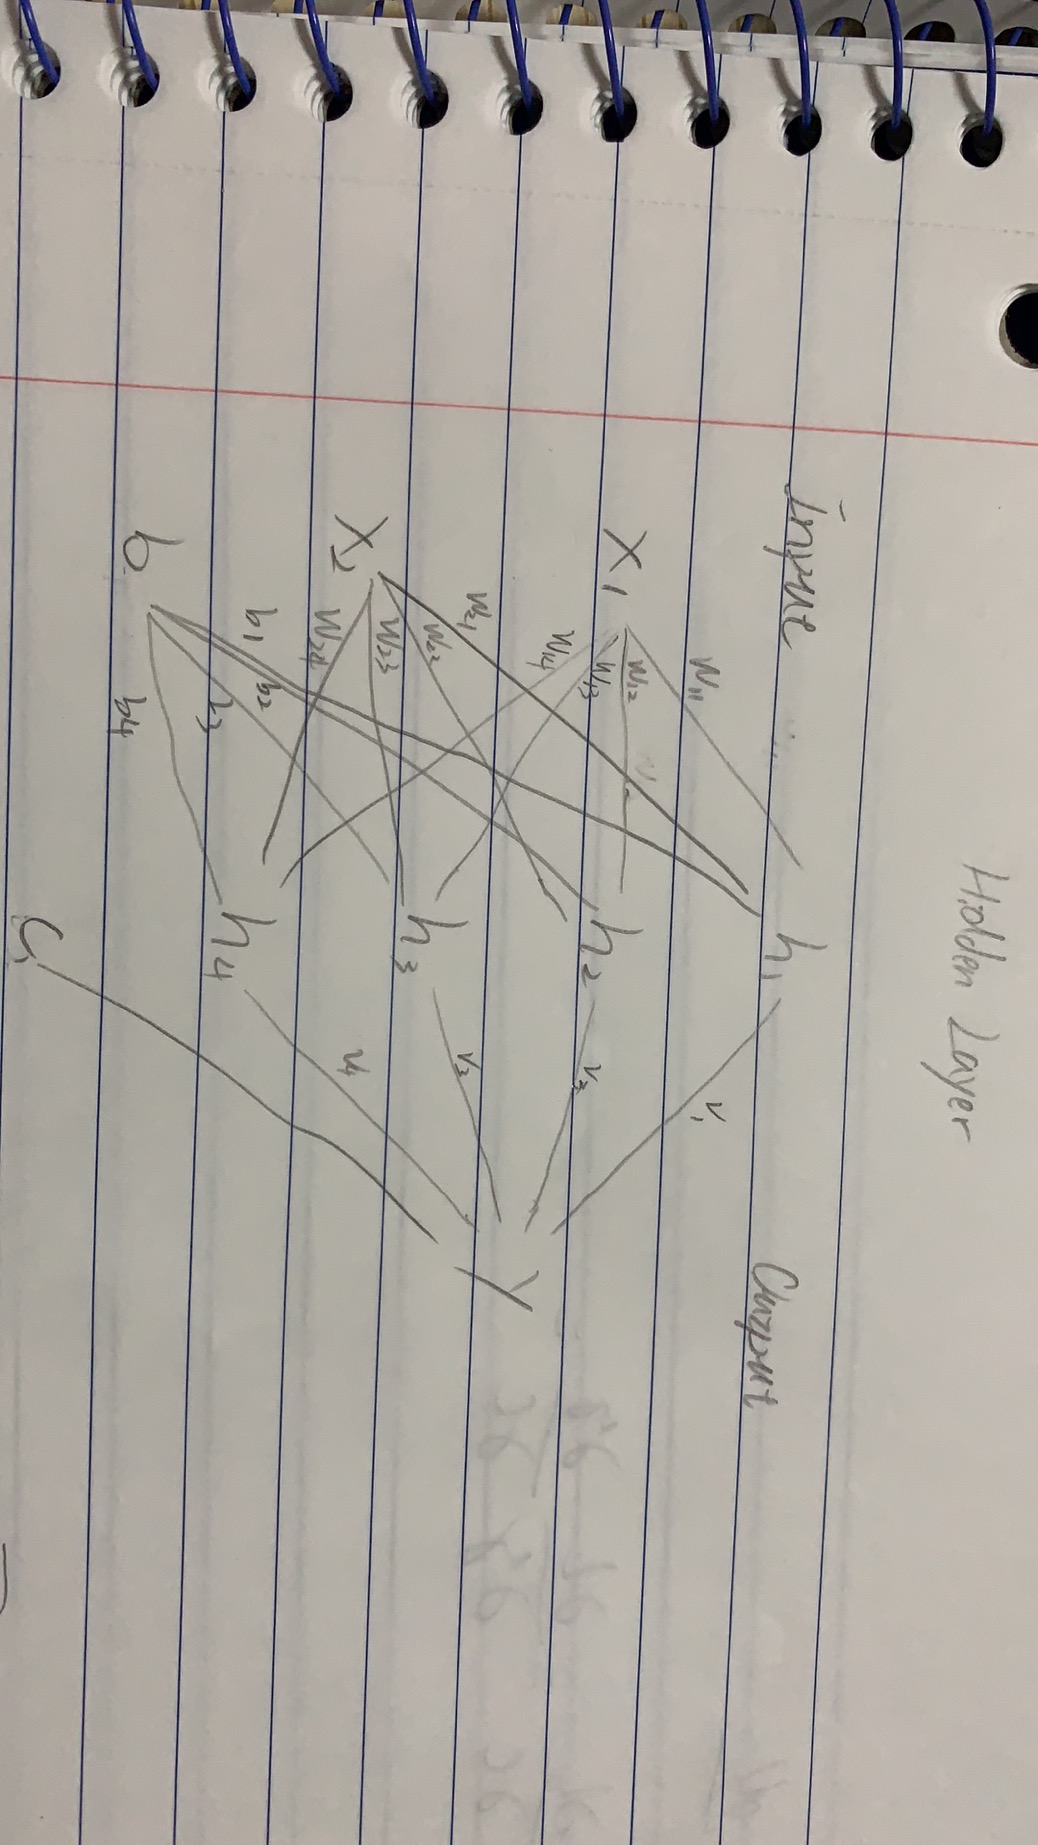

## 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

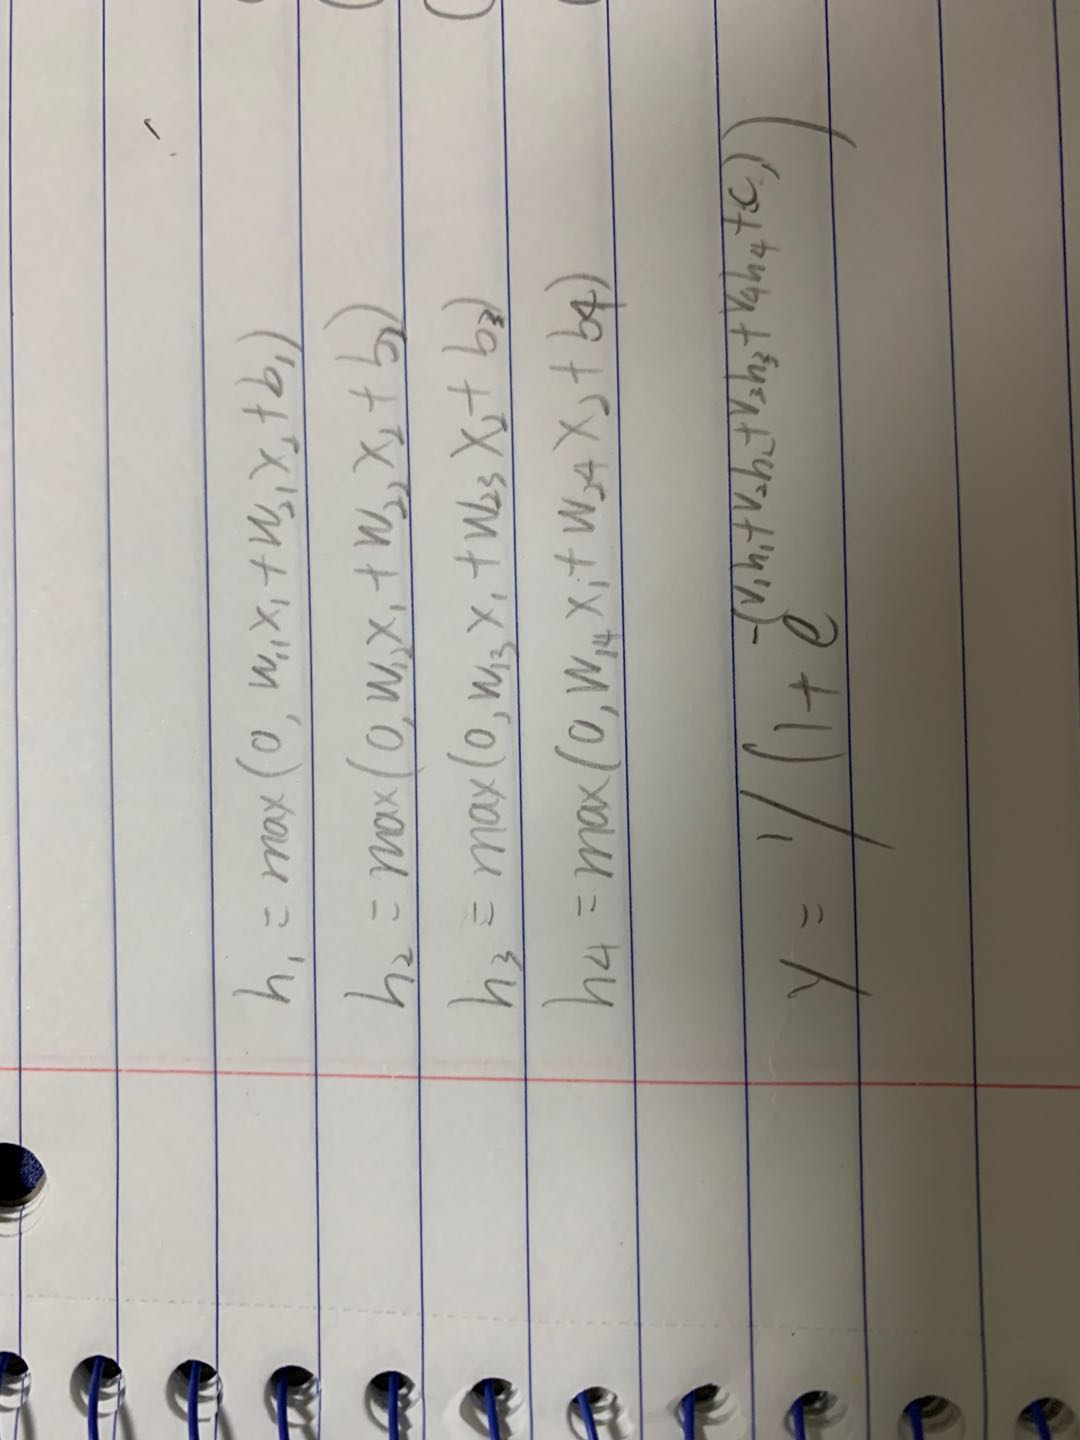

## 3. Write out the forward-pass function in python, call it ff nn ReLu(...)


In [2]:
def ReLu(z):
  return np.maximum(0,z)

def sigmoid(z):
  return 1/(1+np.exp(-np.array(z)))

def ff_nn_ReLu(X, W, b, V, c):
  H=ReLu(np.dot(np.array(X),np.array(W))+b)
  Y=sigmoid(np.dot(H,np.array(V))+c)
  return Y

## 4. Suppose you have the following set of weight matrices:

In [3]:
X=[[1, -1],
   [0, -1],
   [0, 1]]

W=[[1, -1, 0, 1],
   [0, 0, 0.5, 1]]

V=[1, 0, -1, 1]

b=[0, 0, 1, 0]
c=[1]

Y=ff_nn_ReLu(X, W, b, V, c)

print('the results of each sample are', Y)

the results of each sample are [0.81757448 0.62245933 0.62245933]


# 2 Gradient Descent


## 1. What are the partial derivatives of f with respect to x and to y?

$$df/dx=-3x^2+100x-200y^2$$
$$df/dy=800y^3-400xy$$

## 2. Create a visualization of the contours of this function.

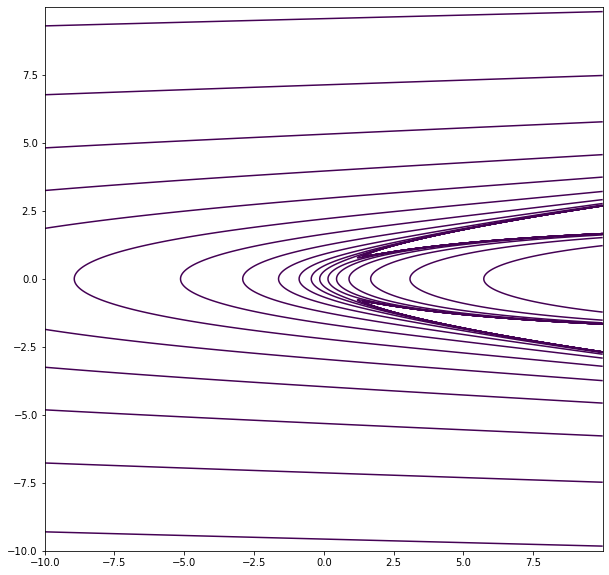

In [4]:
x=np.arange(-10, 10, 0.01)
y=np.arange(-10, 10, 0.01)
X,Y=np.meshgrid(x,y)
F=3 - X**3 + 50 * (2 * Y**2 - X)**2

plt.figure(figsize=(10,10))
plt.contour(X, Y, F, np.logspace(-5,20,base=10))

## 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.


In [5]:
def gradient(vector):
  x,y=vector
  df_dx = -3 * x**2 + 100 * x - 200 * y**2
  df_dy = 800 * y**3 - 400 * x * y
  return np.array([df_dx, df_dy])

def grad_descent(starting_point, iterations, learning_rate):
  point = starting_point
  trajectory = [point]
    
  for i in range(iterations):
    grad = gradient(point)
    point = point - learning_rate * grad
    trajectory.append(point)
    
  return np.array(trajectory)


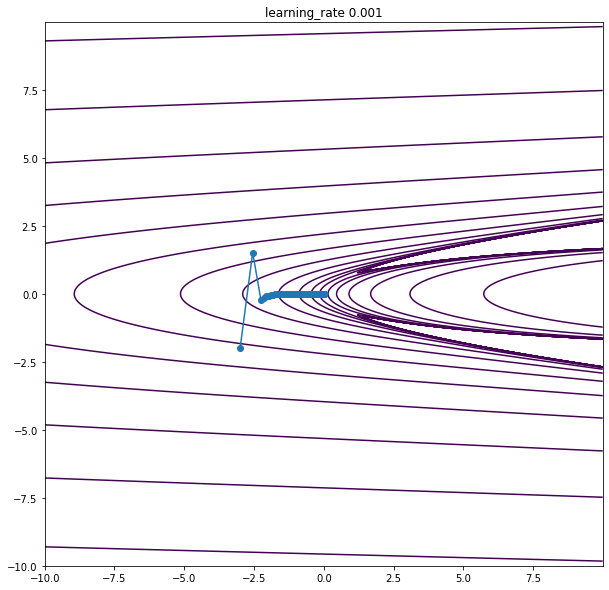

In [6]:
traj = grad_descent(starting_point=[-3, -2] ,iterations=1000, learning_rate=0.0004)

plt.figure(figsize=(10,10))
plt.title('learning_rate 0.001')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

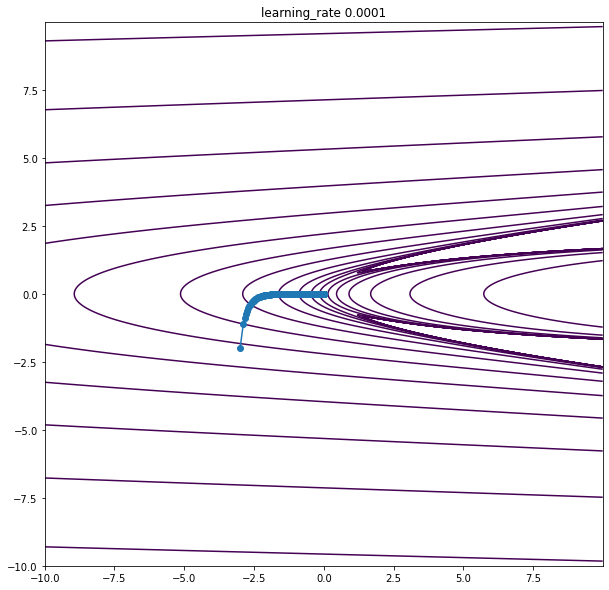

In [7]:
traj = grad_descent(starting_point=[-3, -2] ,iterations=1000, learning_rate=0.0001)

plt.figure(figsize=(10,10))
plt.title('learning_rate 0.0001')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

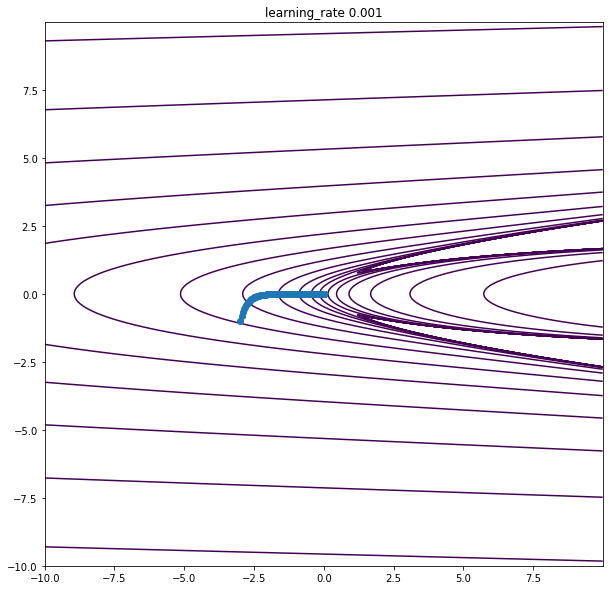

In [8]:
traj = grad_descent(starting_point=[-3,-1] ,iterations=1000, learning_rate=0.0001)

plt.figure(figsize=(10,10))
plt.title('learning_rate 0.001')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

## 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
  point=starting_point
  trajectory=[point]
  v=np.array([0,0])

  for i in range(iterations):
    grad=gradient(point)
    v= alpha * v - epsilon * grad
    point = point + v
    trajectory.append(point)
  return np.array(trajectory)

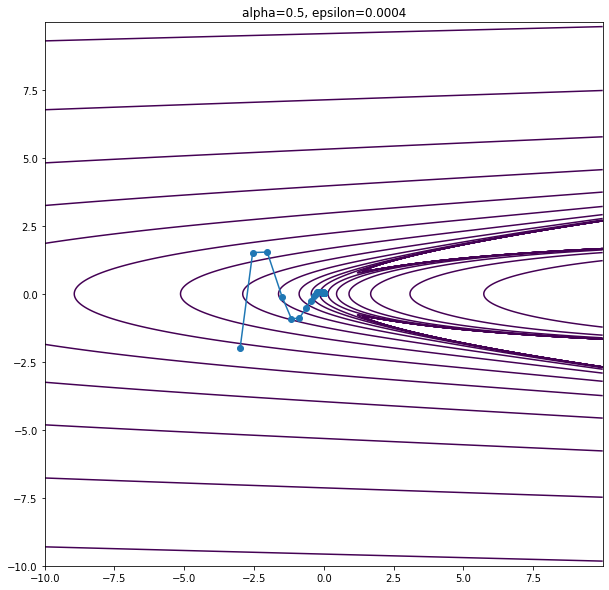

In [10]:
traj = grad_descent_with_momentum(starting_point=[-3,-2], iterations=1000, alpha=0.5, epsilon=0.0004)

plt.figure(figsize=(10,10))
plt.title('alpha=0.5, epsilon=0.0004')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

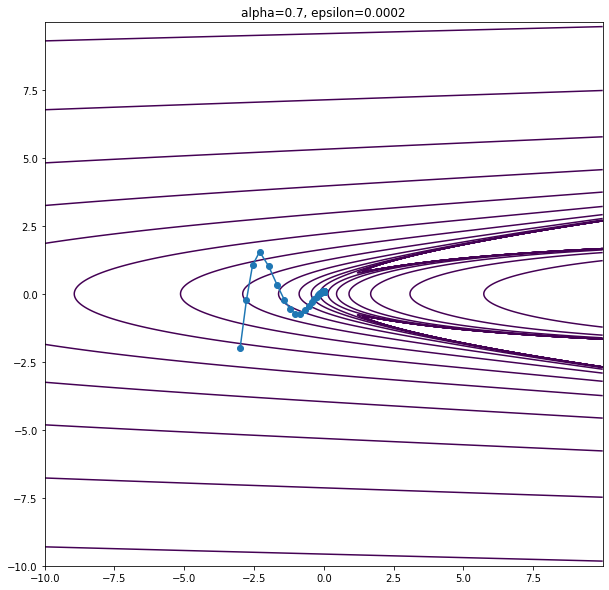

In [11]:
traj = grad_descent_with_momentum(starting_point=[-3,-2], iterations=1000, alpha=0.7, epsilon=0.0002)

plt.figure(figsize=(10,10))
plt.title('alpha=0.7, epsilon=0.0002')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

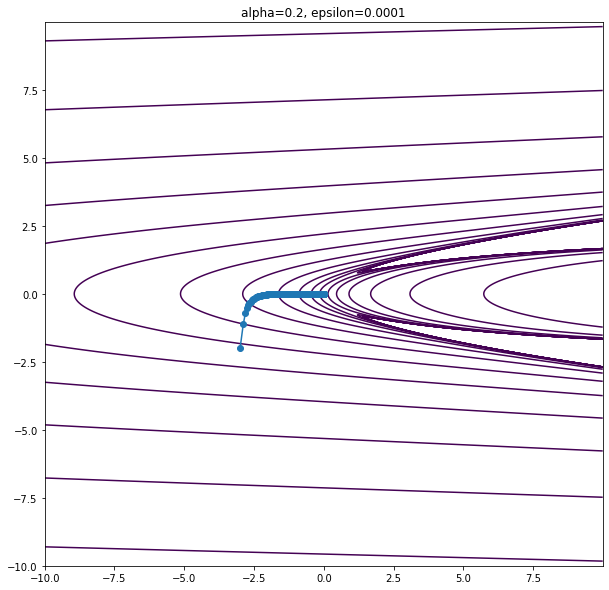

In [12]:
traj = grad_descent_with_momentum(starting_point=[-3,-2], iterations=1000, alpha=0.2, epsilon=0.0001)

plt.figure(figsize=(10,10))
plt.title('alpha=0.2, epsilon=0.0001')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

## 3 Backprop

## 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters

set $z=v_1h_1+v_2h_2+v_3h_3+v_4h_4+c$
$$dL/dc=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}$$

$$dL/dv_{1}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_1$$
$$dL/dv_{2}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_2$$
$$dL/dv_{3}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_3$$
$$dL/dv_{4}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_4$$

$$dL/db_{1}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1$$
$$dL/db_{2}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2$$
$$dL/db_{3}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3$$
$$dL/db_{4}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4$$

$$dL/dw_{11}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1x_1$$
$$dL/dw_{12}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2x_1$$
$$dL/dw_{13}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3x_1$$
$$dL/dw_{14}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4x_1$$
$$dL/dw_{21}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1x_2$$
$$dL/dw_{22}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2x_2$$
$$dL/dw_{23}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3x_2$$
$$dL/dw_{24}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4x_2$$

## 2. Write a function grad f(...) that takes in a weights vector and return the gradient of the Loss at that location

In [13]:
def grad_f(X,Y,W,b,V,c):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  loss=(Y/Y_hat-(1-Y)/(1-Y_hat))
  h=ReLu(np.dot(X,W)+b)

  dc=loss*(Y_hat*(1-Y_hat))
  dv=dc.T.dot(h)
  db=dc.T.dot(np.where(h<=0,0,1))*V
  dw=X.T.dot(np.expand_dims(dc,1)).dot(np.expand_dims(V,1).T)
  dc=np.average(loss*(Y_hat*(1-Y_hat)))
  return np.array([dw,db,dv,dc])

## 3. Generate a synthetic dataset like the XOR pattern (see below).

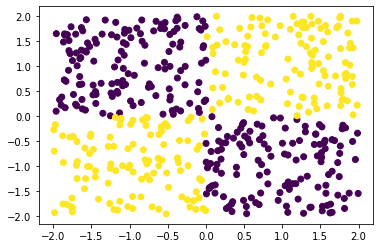

In [14]:
x = np.random.uniform(-2,2,1000).reshape((500,2))
y = np.zeros(500)
y[x[:,0] * x[:,1]>0]=1

plt.scatter(x[:,0],x[:,1],c=y)

## 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [15]:
def loss(Y, Y_hat):
    return  np.sum(-(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))

def grad_descent(X, Y, W, b, V, c, iterations=20, learning_rate=0.0015):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  losses=[loss(Y,Y_hat)]

  for i in range(iterations):
    dw, db, dv, dc = grad_f(X, Y, W, b, V, c)
    W = W+learning_rate*dw
    b = b+learning_rate*db
    V = V+learning_rate*dv
    c = c+learning_rate*dc
    Y_hat=ff_nn_ReLu(X,W,b,V,c)
    losses.append(loss(Y,Y_hat))
  params=np.array([W,b,V,c])
  return params, losses

params, losses = grad_descent(x, y, W, b, V, c)
losses

[417.32540366859524,
 321.39581407478363,
 288.64834395484155,
 280.5814852400474,
 277.2080004894247,
 275.0545799430512,
 273.31504160668084,
 271.78818403714547,
 270.41739680736544,
 269.1946930523912,
 268.0681520803346,
 267.0201754392916,
 266.06619747370934,
 265.182772418965,
 264.35654187775265,
 263.58589583911066,
 262.86114563094236,
 262.1953092104437,
 261.5743465118663,
 260.9996593189263,
 260.48031407248953]

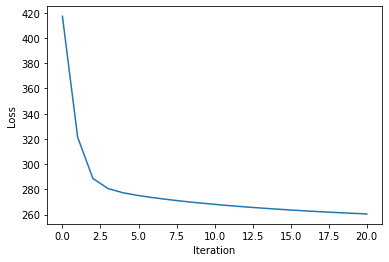

In [16]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

## 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [17]:
def grad_descent_with_momentum(X, Y, W, B, V, C, iterations=20, alpha=0.4, epsilon=0.0015):
  Y_hat = ff_nn_ReLu(X,W,B,V,C)
  losses = [loss(Y, Y_hat)]
  w = np.zeros(np.array(W).shape)
  b = np.zeros(np.array(B).size)
  v = np.zeros(np.array(V).size)
  c = 0

  for i in range(iterations):
    dw,db,dv,dc = grad_f(X, Y, W, B, V, C)
    print(dc)
    w = alpha*w - epsilon*dw
    b = alpha*b - epsilon*db
    v = alpha*v - epsilon*dv
    c = alpha*c - epsilon*dc
    W = W-w
    B = B-b
    V = V-v
    C = C-c
    Y_hat = ff_nn_ReLu(X,W,B,V,C)

    losses.append(loss(Y, Y_hat))
  params=np.array([W,B,V,C])
  return params, losses

params_momentum, losses =  grad_descent_with_momentum(x, y, W, b, V, c)
losses 

-0.24181604140482676
-0.13672416227627013
0.016269875727193097
0.047877853930531046
9.507761326223618e-05
-0.017197645530155334
-0.004844888150409886
0.004249673068031382
-0.0004705755623477927
-0.005680256343996774
-0.003312186646051315
0.0006615364670477282
0.0006427982789725876
-2.7719345653695716e-05
0.0010933415625717627
0.002125623443760769
0.002190471285062799
0.002539255054419269
0.003085455417158642
0.003442447566900851


[417.32540366859524,
 321.39581407478363,
 287.6333160765744,
 286.18805059547924,
 276.71386050231024,
 272.21399171622187,
 269.5510129583334,
 268.5705050891831,
 266.9368630807045,
 265.3332861561148,
 263.9768295026934,
 262.7615149765501,
 261.6209390714825,
 260.7339806688337,
 260.0946439865834,
 259.49121555228896,
 258.88321592125794,
 258.3829732508957,
 257.97576895738507,
 257.62968345270997,
 257.3526755163233]

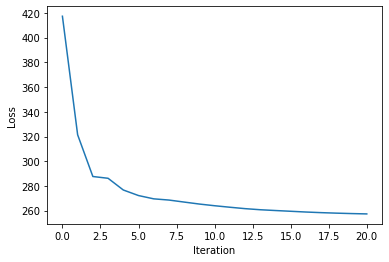

In [18]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

gradient with momemtum converges much faster

## 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


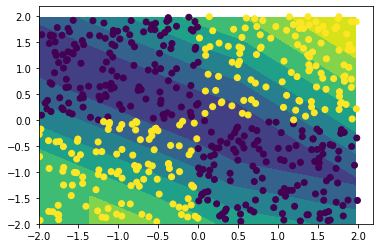

In [65]:
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)

X1, X2 = np.meshgrid(x1, x2)
W, B, V, C= params_momentum

Y_hat= ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,W,B,V,C).reshape((160,160))
plt.contourf(X1, X2, Y_hat)
plt.scatter(x[:, 0], x[:, 1], c=y)